In [1]:
#Load and Normalize CIFAR 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

batch_size = 256

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
#let us show some training images, for  fun

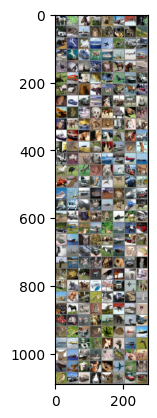

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#function to show an image after normalization


def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1,2,0)))
    plt.show()


#get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

#show images
imshow(torchvision.utils.make_grid(images))
    

In [6]:
#Define the convolution neural network

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,3,1,padding =1)
        self.conv2 = nn.Conv2d(16,32,3,1, padding=1)
        self.conv3 = nn.Conv2d(32,64,3,1,padding=1)
        self.fc1 = nn.Linear(4*4*64, 500)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net = CNN().to(device)

cpu


In [9]:
#Defi

In [14]:
import torch.optim as optim

loss_fun = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01,momentum=0.9)

In [15]:
#train the network

In [17]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0

    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        loss = loss_fun(outputs,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    with torch.no_grad():
        for val_inputs , val_labels in valloader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = net(val_inputs)
            val_loss = loss_fun(val_outputs, val_labels)

            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_corrects +=torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/(len(trainloader)*batch_size)
    epoch_acc = running_corrects.float()/(len(trainloader)*batch_size)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc.cpu().numpy())

    val_epoch_loss = val_running_loss/(len(valloader)*batch_size)
    val_epoch_acc = val_running_corrects.float()/(len(valloader)*batch_size)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc.cpu().numpy())
    print("epoch: " , (e+1))
    print("training loss: ", epoch_loss ,"+" ," acc :",epoch_acc.item())
    print("validation loss:",val_epoch_loss,"+","acc:",val_epoch_acc.item())

epoch:  1
training loss:  0.00634991340766832 +  acc : 0.4056720435619354
validation loss: 0.005748085107188672 + acc: 0.45146483182907104
epoch:  2
training loss:  0.00566149631049484 +  acc : 0.4722377359867096
validation loss: 0.005374917120207101 + acc: 0.48017579317092896
epoch:  3
training loss:  0.005199048226243075 +  acc : 0.5166812539100647
validation loss: 0.005043196212500334 + acc: 0.5245116949081421
epoch:  4
training loss:  0.004767475200683943 +  acc : 0.5622608661651611
validation loss: 0.004727222362998873 + acc: 0.54833984375
epoch:  5
training loss:  0.004421787857961822 +  acc : 0.5958226919174194
validation loss: 0.0043594578804913905 + acc: 0.58740234375
epoch:  6
training loss:  0.004080319174859977 +  acc : 0.625996470451355
validation loss: 0.00409674464026466 + acc: 0.614453136920929
epoch:  7
training loss:  0.003759371430366015 +  acc : 0.6573660969734192
validation loss: 0.0039123600057791915 + acc: 0.6322265863418579
epoch:  8
training loss:  0.0034892602

In [ ]:
plt.style.use('ggplot')
plt.plot(running_loss_history, label='training_loss')
plt.plot(val_running_loss_history, label='validation_loss')
plt.legend()

In [ ]:
plt.style.use("ggplot")
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
#Let's quickly save our trained model

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

In [ ]:
#test the network on the test data

In [ ]:
dataiter = iter(valloader)
images, labels = next(dataiter)

In [ ]:
#print_images
imshow(torchvision.utils.make_grid(images))


In [ ]:
#lets load back i 

In [ ]:
net = CNN()
net.load_state_dict(torch.load)